In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('fraud_prediction.csv')

In [2]:
features = df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

In [3]:
lasso_regression = Lasso()

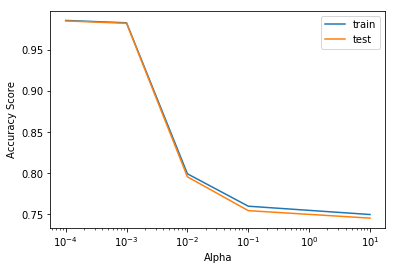

In [4]:
train_errors = []
test_errors = []

alpha_list = [0.0001, 0.001, 0.01, 0.1, 10]

# Evaluate the training and test classification errors for each value of alpha

for value in alpha_list:
    
    # Create Lasso object and fit
    lasso_regression = Lasso(alpha= value)
    lasso_regression.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errors.append(lasso_regression.score(X_train, y_train) )
    test_errors.append(lasso_regression.score(X_test, y_test))
    
# Plot results
plt.semilogx(alpha_list, train_errors, alpha_list, test_errors)
plt.legend(("train", "test"))
plt.ylabel('Accuracy Score')
plt.xlabel('Alpha')
plt.show()

In [5]:
grid = GridSearchCV(lasso_regression, {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10]})
grid.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [6]:
print("the most optimal value of alpha is:", grid.best_params_)

the most optimal value of alpha is: {'alpha': 0.0001}


In [7]:
lasso_regression = Lasso(alpha = 0.0001)

In [8]:
lasso_regression.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [9]:
print( "{0:.4}".format(lasso_regression.score(X_test,y_test)))

0.9858


In [23]:
pipeline_order = [('scaler', StandardScaler()), ('linear_reg', Lasso())]
pipeline = Pipeline(pipeline_order)

lasso_scaled = pipeline.fit(X_train, y_train)

print( "{0:.4}".format(lasso_scaled.score(X_test, y_test)))

#In this particular case scaling the data did not provide improment in the model performance, but
#it is important to do this as it does lead to improvements in accuracy score in most cases

-2.762e-10
